In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
def generate_random_dataset(size):
    X = []
    rand = random.randint(1, 199)
    for _ in range(size):
        if rand % 3 == 0:
            X.append([np.round(random.uniform(2, 4), 1), np.round(random.uniform(0, 15), 1)])
        elif rand % 3 == 1:
            X.append([np.round(random.uniform(1, 5), 2), np.round(random.uniform(20, 25), 2)])
        else:
            X.append([np.round(random.uniform(3, 8), 2), np.round(random.uniform(5, 25), 2)])
    return X


def makePoints1(dataset):
    Y = []
    data = sorted(dataset, key=lambda x: x[0])
    max_val = data[len(data) - 1][0]
    min_val = data[0][0]
    s1 = (max_val + min_val) / 2
    for ix in dataset:
        if ix[0] <= s1:
            Y.append(0)
        else:
            Y.append(1)
    return Y

def makePoints2(dataset):
  Y = []
  for ix in dataset :
      # print (ix[0])
      # print(ix[1])
      # print ("-------")
      if ( ix[0] <=  4 and ix[1] <= 20 ) :
          Y.append(1)
      else :
          Y.append(0)
  return Y

def is_the_point_in_circle(ix , xceneter , ycenter , radious ) :
    rtmp = ( ix[0] - xceneter )**2 + ( ix[1]-ycenter)**2
    if( rtmp <= radious**2 ) :
        return True
    return False

def turn_points_2Circles( X  ,radious , xceneter , ycenter ) :
    Y = []
    for ix in X:
        if( is_the_point_in_circle(ix , xceneter , ycenter , radious ) or is_the_point_in_circle(ix , xceneter+3 , ycenter+4 , radious-0.5 ) ) :
           Y.append(0)
        else:
            Y.append(1)
    return Y

def ClassifiyedPoints(X, Y):
    x0 = []
    x1 = []
    for i in range(len(X)):
        if Y[i] == 1:
            x1.append(X[i])
        else:
            x0.append(X[i])
    return x0, x1

In [19]:
def plot_decision_boundary(ax, pred_func, X, y):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

linear kernel accuracy :  1.0
rbf kernel accuracy :  0.95
sigmoid kernel accuracy :  0.55
poly kernel accuracy :  1.0


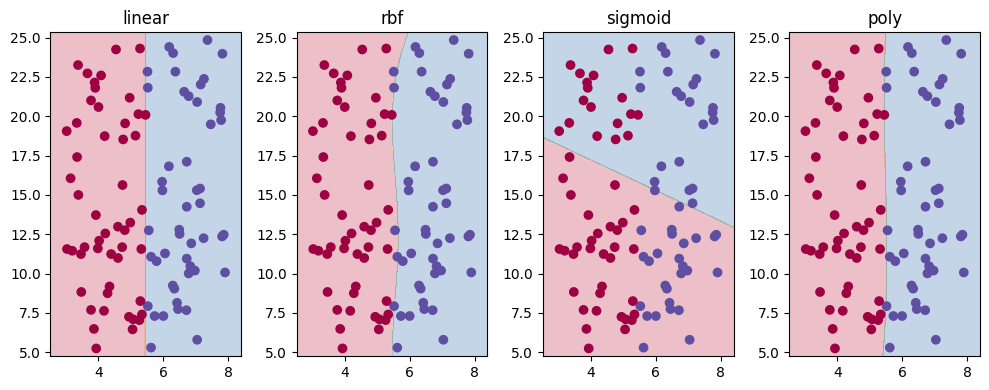

In [20]:
X_train = []
X_test = []
Y_train = []
Y_test = []
x0_vals = []
x1_vals = []
o = -1

size = 500
while o == -1:
    dataset = generate_random_dataset(size)
    label = makePoints1(dataset)
    dataset = np.array(dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)
    x0_vals, x1_vals = ClassifiyedPoints(X_train, Y_train)

    if x0_vals == 0 or x1_vals == 0:
        o = -1
    else:
        o = 0


# Instantiate the classifier
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf3 = SVC(kernel='sigmoid')
clf4 = SVC(kernel='poly', gamma="auto")

# Fit the classifier on the training data
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)

# Predictions and Accuracy
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )

# Adjust figsize as needed
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

# Plot decision boundary
plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()

linear kernel accuracy :  0.95
rbf kernel accuracy :  0.81
sigmoid kernel accuracy :  0.77
poly kernel accuracy :  0.99


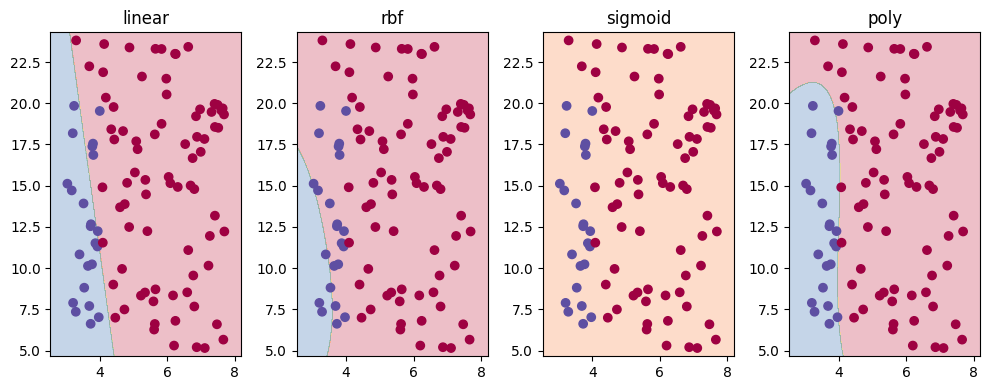

In [21]:
X_train = []
X_test = []
Y_train = []
Y_test = []
x0_vals = []
x1_vals = []
o = -1

size = 500
while o == -1:
    dataset = generate_random_dataset(size)
    label = makePoints2(dataset)
    dataset = np.array(dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)
    x0_vals, x1_vals = ClassifiyedPoints(X_train, Y_train)

    if x0_vals == 0 or x1_vals == 0:
        o = -1
    else:
        o = 0


# Instantiate the classifier
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf3 = SVC(kernel='sigmoid')
clf4 = SVC(kernel='poly', gamma="auto")

# Fit the classifier on the training data
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)

# Predictions and Accuracy
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )

# Adjust figsize as needed
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

# Plot decision boundary
plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()

linear kernel accuracy :  0.83
rbf kernel accuracy :  0.89
sigmoid kernel accuracy :  0.78
poly kernel accuracy :  0.93


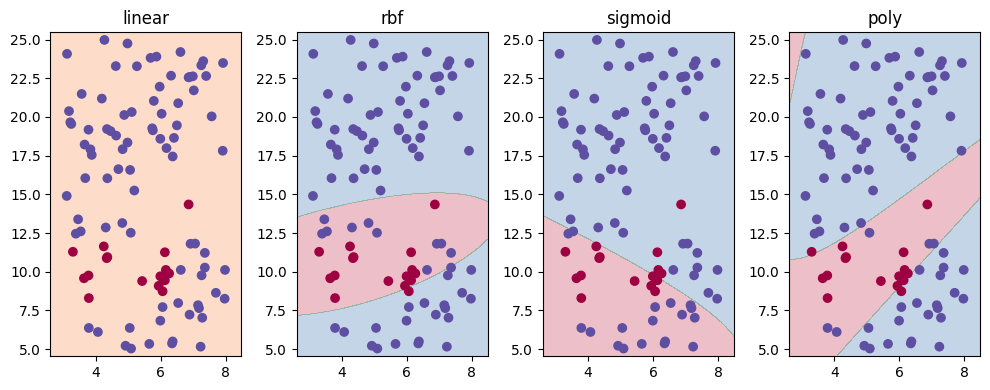

In [22]:
X_train = []
X_test = []
Y_train = []
Y_test = []
x0_vals = []
x1_vals = []
o = -1

size = 500
while o == -1:
    dataset = generate_random_dataset(size)
    label = turn_points_2Circles(dataset , 2.5 , 4 , 10 )
    dataset = np.array(dataset)
    X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)
    x0_vals, x1_vals = ClassifiyedPoints(X_train, Y_train)

    if x0_vals == 0 or x1_vals == 0:
        o = -1
    else:
        o = 0


# Instantiate the classifier
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='rbf')
clf3 = SVC(kernel='sigmoid')
clf4 = SVC(kernel='poly', gamma="auto")

# Fit the classifier on the training data
clf1.fit(X_train, Y_train)
clf2.fit(X_train, Y_train)
clf3.fit(X_train, Y_train)
clf4.fit(X_train, Y_train)

# Predictions and Accuracy
predictions = clf1.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "linear kernel accuracy : " , accuracy )
predictions = clf2.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "rbf kernel accuracy : " , accuracy )
predictions = clf3.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "sigmoid kernel accuracy : " , accuracy )
predictions = clf4.predict( X_test )
accuracy = accuracy_score(Y_test, predictions)
print( "poly kernel accuracy : " , accuracy )

# Adjust figsize as needed
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

# Plot decision boundary
plot_decision_boundary(axs[0], lambda X_test: clf1.predict(X_test), X_test, Y_test)
axs[0].set_title('linear')


plot_decision_boundary(axs[1], lambda X_test: clf2.predict(X_test), X_test, Y_test)
axs[1].set_title('rbf')

plot_decision_boundary(axs[2], lambda X_test: clf3.predict(X_test), X_test, Y_test)
axs[2].set_title('sigmoid')


plot_decision_boundary(axs[3], lambda X_test: clf4.predict(X_test), X_test, Y_test)
axs[3].set_title('poly')

plt.tight_layout()

plt.show()